![uzduotis](uzduotis.PNG)

## Užduotis

1. [Versija] Apžvelgti vairuotojų kelionių duomenis ir pasvarstyti apie galimybes optimizuoti jų darbo/budėjimo vietų pasirinkimą taip, kad būtų maksimizuojamas uždarbis.

2. [Versija] Find the best locations for drivers to be at (depending on the specific time) in order to get maximum value out of rides.

3. [Versija] ištirti algoritminio užsakymo vietos numatymo perspektyvumą, remiantis pateiktais duomenimis, siekiant nukreipti vairuotoją link didžiausios važiavimo vertės vietų. 


* Svarbu yra vieta. Vietą priklausomai nuo laiko apibrėžia kelionių vertės toje vietoje.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('robotex4.csv')

In [3]:
df.head()

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value
0,2022-03-11 03:20:51.446343000,59.435092,24.746192,59.413620,24.669301,1.221750
1,2022-03-21 18:51:11.394013000,59.440585,24.704871,59.448580,24.695094,0.260000
2,2022-03-23 06:44:57.844104000,59.424660,24.736591,59.414483,24.816408,1.142750
3,2022-03-26 14:42:25.716000000,59.424239,24.724754,59.401068,24.644707,1.280845
4,2022-03-09 08:10:41.153870000,59.436079,24.732235,59.397603,24.680948,1.283000


In [4]:
# truksta pabaigos
# neaisku, kiek laiko vaziavo
# ar dienos metus vienokia suma, nakti kitokia - isfiltruoti paros laiko ir keliones ilgio raidus ir paziureti ar skiriasi tarifai
# padalinti para i kibirelius, kad galetumem pamatyti, kur yra piko metas
# darbo dienos ir savaitgaliai - is kur ir i kur vaziuoja zmones 
# kas labiau apsimoka - viena ilga, ar daug trumpu. 
# isskaicuoti, koks keliones ilgis DONE


In [5]:
# 1. padaryti nauja stulpeli, kuris turetu savaites dienos pavadinima.

In [6]:
df.start_time = pd.to_datetime(df.start_time)

In [7]:
df['weekday'] = df.start_time.map(lambda x: x.weekday())

In [8]:
# 0 yra pirmadienis

In [9]:
# 2. padaryti nauja stulpeli - keliones atstumas. 

In [10]:
#  pip install geopy

In [11]:
from geopy import distance

def get_distance(x):
    start = (x['start_lat'], x['start_lng'])
    end = (x['end_lat'], x['end_lng'])
    return distance.distance(start, end).km

In [12]:
%%time
df['distance'] = df.apply(lambda x: get_distance(x), axis=1)

CPU times: user 2min 28s, sys: 611 ms, total: 2min 29s
Wall time: 2min 29s


In [13]:
%%time
# ismatuoja celes veikimo laika
df

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,weekday,distance
0,2022-03-11 03:20:51.446343,59.435092,24.746192,59.413620,24.669301,1.221750,4,4.977263
1,2022-03-21 18:51:11.394013,59.440585,24.704871,59.448580,24.695094,0.260000,0,1.049295
2,2022-03-23 06:44:57.844104,59.424660,24.736591,59.414483,24.816408,1.142750,2,4.671221
3,2022-03-26 14:42:25.716000,59.424239,24.724754,59.401068,24.644707,1.280845,5,5.227355
4,2022-03-09 08:10:41.153870,59.436079,24.732235,59.397603,24.680948,1.283000,2,5.181855
...,...,...,...,...,...,...,...,...
660216,2022-03-25 12:39:59.295086,59.417072,24.799048,59.405560,24.706132,1.328000,4,5.430155
660217,2022-03-03 13:45:37.653168,59.440089,24.729332,59.434221,24.823899,1.322000,3,5.405915
660218,2022-03-04 12:02:42.630196,59.370844,24.668771,59.406154,24.704330,1.097000,4,4.422302
660219,2022-03-04 07:27:50.955369,59.489902,24.933111,59.400403,24.825276,2.899250,4,11.697635


In [14]:
# 3.  ar skiriasi keliones savaitgali ir darbo dienomis? 

In [15]:
for col in df.columns:
    print(col, sum(df[col].isna()))

start_time 0
start_lat 0
start_lng 0
end_lat 0
end_lng 0
ride_value 0
weekday 0
distance 0


In [16]:
# 1. reikia moketi indentifikuoti vieta. 
# 2. gebeti apibrezti teritorija, kur yra daug raidu, kuriu kaina yra didesne negu kazkoks skaicius (pvz. 10)

# Esu taksi vairuotojas, kur man vaziuoti? 

In [17]:
df[df.ride_value>=10]

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,weekday,distance
394,2022-03-26 08:41:28.923895,59.440991,24.729329,36.896686,30.713077,631.089500,5,2543.524007
1419,2022-03-28 13:45:34.874550,59.434596,24.733634,58.369204,22.287646,45.009500,0,184.264118
2887,2022-03-02 12:12:18.820096,59.376338,24.708980,59.009349,24.792658,10.249750,2,41.160739
2934,2022-03-05 23:10:42.919000,59.429112,24.778062,-34.922339,-56.152133,2848.886578,5,12797.926785
3246,2022-03-19 12:05:20.413322,59.409246,24.708832,40.726812,-73.986430,1464.248750,5,6665.443962
...,...,...,...,...,...,...,...,...
658783,2022-03-20 02:39:58.930056,59.446400,24.733662,-0.000217,-0.000016,1684.961750,6,6934.392618
659246,2022-03-25 00:31:53.810043,59.434493,24.746423,41.878020,-87.629563,1633.558250,4,7191.589029
659549,2022-03-03 00:52:58.816761,59.438885,24.775317,58.346434,24.283632,31.073500,3,124.948876
660025,2022-03-11 15:37:32.267380,59.428576,24.727802,59.111032,26.008287,19.831750,4,81.135248


In [18]:
# pip install folium

In [19]:
import folium 
def display_trip(row):
    vals = row.to_dict()
    map = folium.Map(location=[vals['start_lat'], vals['start_lng']], zoom_start=14, control_scale=True)
    folium.Marker([vals["start_lat"], vals["start_lng"]], tooltip=f'Start, {np.round(vals["distance_km"],2)} km, {np.round(vals["ride_value"], 2)} EUR').add_to(map)
    folium.Marker([vals["end_lat"], vals["end_lng"]], tooltip=f'End, {np.round(vals["distance_km"],2)} km, {np.round(vals["ride_value"], 2)} EUR').add_to(map)
    display(map)

df['distance_km'] = df['distance']   
display_trip(df.iloc[1])

In [20]:
df.iloc[0]

start_time     2022-03-11 03:20:51.446343
start_lat                       59.435092
start_lng                       24.746192
end_lat                          59.41362
end_lng                         24.669301
ride_value                        1.22175
weekday                                 4
distance                         4.977263
distance_km                      4.977263
Name: 0, dtype: object

In [21]:
import numpy as np
display_trip(df.iloc[1])

In [22]:
# 4. Kaip vizualizuoti su heatmapais kelioniu pradzias, kad matytumem, kur yra didele kelioniu koncentracija?
## padaryti su musu duomenimis, kad matytumem kaip sitame zemelapyje
# https://nbviewer.org/github/python-visualization/folium/blob/main/examples/HeatMapWithTime.ipynb

# padarykite heatmaps zemelapi, kur matytusi, kur klasterizuojasi aukstos vertes keliones?
# 1. issiaiskinkite kaip padaryti zemelapi. 
# naudokite 
# # https://nbviewer.org/github/python-visualization/folium/blob/main/examples/HeatMapWithTime.ipynb
# 2. padarykite zemelapi pritaikyta musu duomenims.
    # 1. sugalvokite, kokia laiko delta naudoti
    # 2. sugeneruokite masyvus, kad butu galima juos atvaizduoti zemelapyje
    

In [23]:
df['delta_15_min'] = df.start_time.dt.floor(freq='15T')

df



df = df.sort_values('start_time').reset_index(drop=True)

df_1 = df[df.start_time<='2022-03-02']

time_index = []
time_data = []
for group in df_1[df_1.distance<100].groupby('delta_15_min'):
    time_index.append(group[0])
    temp = group[1]
    temp['weight'] = temp.ride_value.map(lambda x: 1 if x>1 else 0.1 )
    time_data.append(group[1][['start_lat', 'start_lng', 'weight']].values.tolist())

In [24]:
len(time_index)

96

In [25]:
import folium
import folium.plugins as plugins
import numpy as np

m = folium.Map([59.43814207, 24.72867714], tiles="stamentoner", zoom_start=6)

hm = plugins.HeatMapWithTime(time_data, index=[*range(96)], auto_play=True, max_opacity=0.6)

hm.add_to(m)
m

In [26]:
## Atrasti sleksti (threshold), nuo kurios laikysime, kad kelione yra vertinga.

In [27]:
import seaborn as sns

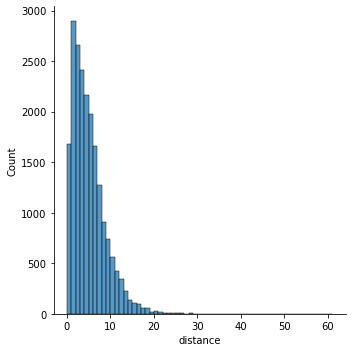

In [28]:
sns.displot(df_1[df_1.distance<100], x="distance", binwidth=1)

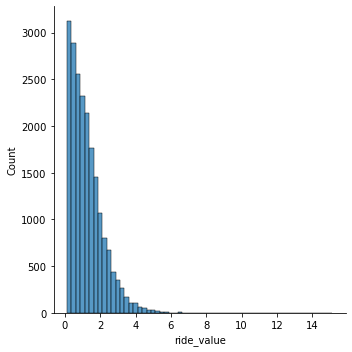

In [29]:
sns.displot(df_1[df_1.distance<100], x="ride_value", binwidth=0.25)

In [30]:
df_1['euro_per_km'] = df_1.ride_value/df_1.distance

/var/folders/8j/9rgk8_2x2318vszx6v35cf9h0000gn/T/ipykernel_54056/2299777458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['euro_per_km'] = df_1.ride_value/df_1.distance


In [31]:
df_1[(df_1.distance<100)&(df_1.distance>1)].euro_per_km.describe()

count    18826.000000
mean         0.246221
std          0.001478
min          0.243958
25%          0.244850
50%          0.245905
75%          0.247413
max          0.249097
Name: euro_per_km, dtype: float64

In [32]:
df_1[(df_1.distance<60)].distance.describe()

count    20480.000000
mean         5.078193
std          3.804450
min          0.009544
25%          2.202537
50%          4.283245
75%          6.949052
max         44.802477
Name: distance, dtype: float64

In [33]:
df_1[(df_1.distance<60)&(df_1.distance>40)]

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,weekday,distance,distance_km,delta_15_min,euro_per_km
3161,2022-03-01 06:09:54.224090000,59.406052,24.625270,59.337838,25.319418,9.81550,1,40.190002,40.190002,2022-03-01 06:00:00,0.244227
5680,2022-03-01 08:38:04.176583000,59.397185,24.636530,59.328541,25.337548,9.91125,1,40.593069,40.593069,2022-03-01 08:30:00,0.244161
8996,2022-03-01 12:32:03.040424000,59.433781,24.751256,59.464096,25.538828,10.95975,1,44.802477,44.802477,2022-03-01 12:30:00,0.244624
9137,2022-03-01 12:41:23.970559000,59.504595,24.842279,59.239228,24.292457,10.60300,1,43.024142,43.024142,2022-03-01 12:30:00,0.246443
13845,2022-03-01 17:02:23.045349000,59.401484,24.688883,59.005517,24.815095,11.12675,1,44.695765,44.695765,2022-03-01 17:00:00,0.248944
20027,2022-03-01 23:21:44.128516999,59.495457,24.902153,59.317909,24.228556,10.56525,1,43.067829,43.067829,2022-03-01 23:15:00,0.245317


In [34]:
df_1[df_1.euro_per_km>0.5]

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,weekday,distance,distance_km,delta_15_min,euro_per_km
111,2022-03-01 00:11:05.318553,59.438205,24.751407,59.437515,24.747217,0.125,1,0.249908,0.249908,2022-03-01 00:00:00,0.500183
293,2022-03-01 00:26:21.682527,59.434837,24.820265,59.435611,24.820257,0.125,1,0.086241,0.086241,2022-03-01 00:15:00,1.449425
337,2022-03-01 00:29:51.611656,59.434889,24.746416,59.434479,24.746243,0.125,1,0.046718,0.046718,2022-03-01 00:15:00,2.675639
403,2022-03-01 00:36:53.270112,59.439763,24.749261,59.439864,24.746658,0.125,1,0.148120,0.148120,2022-03-01 00:30:00,0.843910
451,2022-03-01 00:43:15.320694,59.437874,24.750969,59.437715,24.752030,0.125,1,0.062760,0.062760,2022-03-01 00:30:00,1.991720
...,...,...,...,...,...,...,...,...,...,...,...
20145,2022-03-01 23:30:06.725600,59.432008,24.766806,59.433701,24.768756,0.125,1,0.218691,0.218691,2022-03-01 23:30:00,0.571583
20149,2022-03-01 23:30:41.107302,59.437210,24.749816,59.436987,24.750970,0.125,1,0.070013,0.070013,2022-03-01 23:30:00,1.785379
20207,2022-03-01 23:35:08.894987,59.427327,24.697153,59.428594,24.700353,0.125,1,0.230015,0.230015,2022-03-01 23:30:00,0.543442
20236,2022-03-01 23:37:01.676818,59.436982,24.750274,59.437165,24.753766,0.125,1,0.199216,0.199216,2022-03-01 23:30:00,0.627460


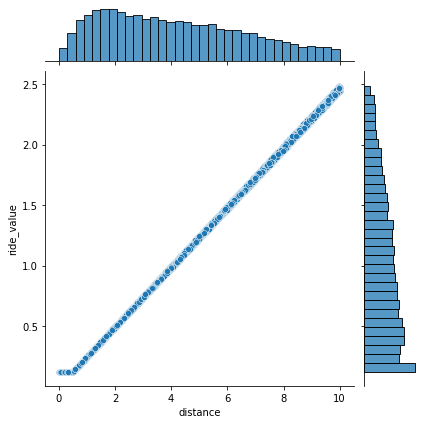

In [35]:
sns.jointplot(data=df_1[df_1.distance<10], x="distance", y="ride_value")

In [36]:
# 5. kaip indentifikuoti dideles vertes klasterius? 

In [37]:
df_1[df_1.distance>1]

,start_time,start_lat,start_lng,end_lat,end_lng,ride_value,weekday,distance,distance_km,delta_15_min,euro_per_km
0,2022-03-01 00:00:07.936317,59.438142,24.728677,59.553133,24.802705,3.35200,1,13.479290,13.479290,2022-03-01 00:00:00,0.248678
1,2022-03-01 00:00:17.556188,59.443230,24.753330,59.391667,24.722047,1.49500,1,6.012515,6.012515,2022-03-01 00:00:00,0.248648
2,2022-03-01 00:00:20.355945,59.431849,24.768252,59.433692,24.728579,0.55275,1,2.260878,2.260878,2022-03-01 00:00:00,0.244485
3,2022-03-01 00:00:20.690881,59.439587,24.748874,59.452895,24.871234,1.73725,1,7.098048,7.098048,2022-03-01 00:00:00,0.244750
4,2022-03-01 00:00:25.804142,59.367751,24.645455,59.396104,24.800205,2.28675,1,9.345522,9.345522,2022-03-01 00:00:00,0.244689
...,...,...,...,...,...,...,...,...,...,...,...
20502,2022-03-01 23:59:08.784761,59.440717,24.732957,59.441376,24.809273,1.05900,1,4.330724,4.330724,2022-03-01 23:45:00,0.244532
20503,2022-03-01 23:59:14.313566,59.445137,24.750926,59.438882,24.726171,0.38475,1,1.567855,1.567855,2022-03-01 23:45:00,0.245399
20504,2022-03-01 23:59:29.242836,59.416932,24.715945,59.431251,24.726022,0.42100,1,1.694652,1.694652,2022-03-01 23:45:00,0.248429
20505,2022-03-01 23:59:34.545010,59.434057,24.755505,59.393837,24.642920,1.91975,1,7.806814,7.806814,2022-03-01 23:45:00,0.245907
